In [585]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from IPython.display import display, clear_output
import scipy.misc
np.set_printoptions(suppress=True)

In [606]:
sobel_x = tf.constant([[1, 0, -1], [2, 0, -2], [1, 0, -1]], tf.float32)
sobel_x_filter = tf.reshape(sobel_x, [3, 3, 1, 1])
sobel_y_filter = tf.transpose(sobel_x_filter, [1, 0, 2, 3])

In [607]:
filter = tf.concat([sobel_x_filter, sobel_y_filter], -1)

In [608]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (700, 700, 1 )))
model.add(tf.keras.layers.Conv2D(2, (3, 3), (1, 1), padding = 'same', use_bias = False))
model.add(tf.keras.layers.Conv2D(1, (1, 1), (1, 1), padding = 'valid', use_bias = False))
model.add(tf.keras.layers.Lambda(lambda x: abs(x)))
model.layers[0].weights[0]

<tf.Variable 'conv2d_74/kernel:0' shape=(3, 3, 1, 2) dtype=float32, numpy=
array([[[[-0.032426  , -0.2538635 ]],

        [[ 0.40180233, -0.13955924]],

        [[-0.32354787, -0.22759062]]],


       [[[ 0.45959768,  0.02560663]],

        [[-0.21874845, -0.08358294]],

        [[ 0.16438004, -0.19137469]]],


       [[[ 0.01186484, -0.03937089]],

        [[-0.10577455,  0.45885667]],

        [[ 0.01661149,  0.44368002]]]], dtype=float32)>

In [609]:
x = tf.convert_to_tensor(model.layers[0].get_weights())
x = np.array(x)
x[0,...,0] = np.expand_dims(sobel_x,-1)
x[0,...,1] = np.expand_dims(np.array(sobel_x).T,-1)
model.layers[0].set_weights(x)

In [610]:
model.layers[1].weights



[<tf.Variable 'conv2d_75/kernel:0' shape=(1, 1, 2, 1) dtype=float32, numpy=
 array([[[[ 0.7575027],
          [-0.8884977]]]], dtype=float32)>]

In [611]:
HALFAWAREOWER = np.ones((1,2))
x = tf.convert_to_tensor(model.layers[1].get_weights())
x = np.array(x)
x[0,...,0] = np.expand_dims(HALFAWAREOWER,1)
model.layers[1].set_weights(x)

In [612]:
model.layers[1].weights[0]


<tf.Variable 'conv2d_75/kernel:0' shape=(1, 1, 2, 1) dtype=float32, numpy=
array([[[[1.],
         [1.]]]], dtype=float32)>

In [613]:
model.summary()


Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 700, 700, 2)       18        
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 700, 700, 1)       2         
_________________________________________________________________
lambda_1 (Lambda)            (None, 700, 700, 1)       0         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [614]:
model.layers[1].weights[0]

<tf.Variable 'conv2d_75/kernel:0' shape=(1, 1, 2, 1) dtype=float32, numpy=
array([[[[1.],
         [1.]]]], dtype=float32)>

In [615]:


from PIL import Image
image = Image.open('/home/jovyan/work/messi5.jpg')

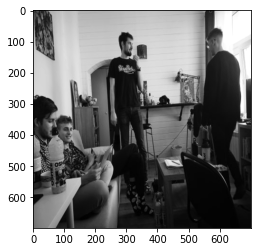

In [616]:
image = image.resize((700,700))
plt.imshow(np.mean(np.array(image),-1), cmap = 'gray')

In [617]:
prediction = model([np.reshape(np.mean(np.array(image),-1), (700, 700, 1))])

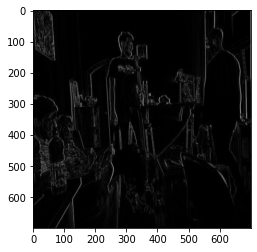

In [618]:
plt.imshow(prediction[...,0], cmap = 'gray')

In [620]:
import coremltools as ct

In [623]:
!pip install tensorflow.python.ops.numpy_ops

ERROR: Could not find a version that satisfies the requirement tensorflow.python.ops.numpy_ops (from versions: none)
ERROR: No matching distribution found for tensorflow.python.ops.numpy_ops
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [622]:
mlmodel = ct.convert(model, source = 'tensorflow')

ModuleNotFoundError: No module named 'tensorflow.python.ops.numpy_ops'